In [1]:
# 特征值转换为对应的总次数\平均值\中位数等进行处理看看效果
# 按照各个特征值进行分组后,统计曝光次数

In [232]:
import pandas as pd
import numpy as np
# 取出训练集
#广告id	素材尺寸	广告行业id	商品类型	商品id	广告账号id	出价_x	曝光日期	曝光次数
# names=['广告id','素材尺寸','广告行业id','商品类型','商品id','广告账号id','出价_x','曝光日期','曝光次数']
# 
#test_samplefile = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\mytraindata.csv',sep='\t')
test_samplefile = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0.csv',sep='\t')
test_sampledf = pd.DataFrame(test_samplefile)
test_sampledf.astype('str')

,样本id,广告id,创建时间,素材尺寸,广告行业id,商品类型,商品id,广告账号id,投放时间,人群定向,出价,曝光次数,曝光日期
0,0,114156,20190217223714,14,221,1,-1,19185,"17592185978880,17592185978880,17592185978880,1...","age:347,787,753,601,144,522,79,847,229,202,829...",60,204.0,20190218
1,2,172599,20190217134519,64,136,1,-1,942,"281474976710655,281474976710655,28147497671065...","age:1,347,787,753,601,522,202,229,731,333,393,...",150,26.0,20190218
2,3,310333,20190217094244,34,12,13,25097,11899,"281474976694272,281474976694272,28147497669427...","age:217,601,79,202,837,942,638,394,347,731,739...",100,5.0,20190218
3,4,358858,20190217095428,30,199,1,-1,19838,"281474976710655,281474976710655,28147497671065...","age:217,601,570,202,837,602,935,942,638,287,31...",130,3.0,20190218
4,6,452383,20190217053808,40,136,13,2613,19085,"211106232532992,211106232532992,21110623253299...",area:7572,80,2.0,20190218
5,7,482671,20190217201132,34,12,13,9957,2401,"17526704308224,17526704308224,17526704308224,1...","age:217,601,79,202,837,942,638,394,347,731,739...",88,2.0,20190218
6,8,494777,20190217095428,64,199,1,-1,19838,"281474976710655,281474976710655,28147497671065...","age:217,601,570,202,837,602,935,942,638,287,31...",130,4.0,20190218
7,9,518686,20190217172755,14,25,1,-1,28907,"281474976710655,281474976710655,28147497671065...","age:99,989,601,729,214,362,507,443,837,870,795...",117,97.0,20190218
8,10,521326,20190217054001,34,146,13,17880,24105,"281474976694272,281474976694272,28147497669427...","age:217,601,79,202,837,942,638,394,347,731,739...",100,1.0,20190218
9,12,580632,20190217122113,34,84,13,12333,5923,"4187848949760,4187848949760,4187848949760,4187...","age:217,601,79,202,837,942,638,394,347,731,739...",163,0.0,20190218


In [53]:
test_sampledf['出价']=test_sampledf['出价'].astype('float')

test_sampledf['曝光次数']=test_sampledf['曝光次数'].astype('int64')
test_sampledf=test_sampledf[test_sampledf['曝光次数']!=0]

test_sampledf['曝光日期']=test_sampledf['曝光日期'].astype('int64')
#转换成星期几 
test_sampledf['曝光日期']=test_sampledf['曝光日期'].apply(lambda x: (x-20190218+1) if (x<20190301) else (x-20190301+11+1))
test_sampledf['曝光日期']=test_sampledf['曝光日期'].mod(7)

In [54]:
ad_id_stat=test_sampledf.groupby(by=['广告id'])['曝光次数'].sum()  #广告id 为index
ad_size_stat=test_sampledf.groupby(by=['素材尺寸'])['曝光次数'].sum()  
ad_industry=test_sampledf.groupby(by=['广告行业id'])['曝光次数'].sum()  
good_type=test_sampledf.groupby(by=['商品类型'])['曝光次数'].sum()  
goods_id=test_sampledf.groupby(by=['商品id'])['曝光次数'].sum()  
ad_account_id=test_sampledf.groupby(by=['广告账号id'])['曝光次数'].sum()  
day_week=test_sampledf.groupby(by=['曝光日期'])['曝光次数'].sum()  

In [38]:
#按索引获取
ad_id_stat[[890]].values[0]

12

In [55]:
day_week

曝光日期
0    171648
1    230073
2    234525
3    173942
4    261798
5    208534
6    187529
Name: 曝光次数, dtype: int64

In [45]:
if 890 in (ad_id_stat.index.get_values()) :
    print(212)
    ad_id_stat[[890]].values[0]
else:
    print(4)

212


In [48]:
#test_sampledf['广告id_s']=test_sampledf['广告id'].apply(lambda x : ad_id_stat[[x]].values[0] if x in (ad_id_stat.index.get_values()) else ad_id_stat.mean())

In [50]:
test_sampledf['广告id_s']=test_sampledf['广告id'].apply(lambda x : ad_id_stat[[x]].values[0])
test_sampledf['素材尺寸_s']=test_sampledf['素材尺寸'].apply(lambda x : ad_size_stat[[x]].values[0])
test_sampledf['广告行业id_s']=test_sampledf['广告行业id'].apply(lambda x : ad_industry[[x]].values[0])
test_sampledf['商品类型_s']=test_sampledf['商品类型'].apply(lambda x : good_type[[x]].values[0])
test_sampledf['商品id_s']=test_sampledf['商品id'].apply(lambda x : goods_id[[x]].values[0])
test_sampledf['广告账号id_s']=test_sampledf['广告账号id'].apply(lambda x : ad_account_id[[x]].values[0])
test_sampledf['曝光日期_s']=test_sampledf['曝光日期'].apply(lambda x : day_week[[x]].values[0] )

In [84]:

test_samplefile_o = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0.csv',sep='\t')
test_sampledf_o = pd.DataFrame(test_samplefile_o)
test_sampledf['曝光日期']=test_sampledf_o['曝光日期']
test_sampledf['日期']=test_sampledf['曝光日期'].apply(lambda x: (x-20190218+1) if (x<20190301) else (x-20190301+11+1))

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [71]:
test_sampledf.to_csv("E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0_typeStatistic.csv",sep=",",
                    index=False,encoding="utf-8")

In [240]:
test_sampledf = pd.DataFrame(pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0_typeStatistic.csv'
                                         ,sep=','))

attrs=['广告id_s','素材尺寸_s','广告行业id_s','商品类型_s','商品id_s','广告账号id_s','日期','曝光日期_s','出价','曝光次数']
test_sampledf=test_sampledf[attrs]

In [241]:
test_sampledf

,广告id_s,素材尺寸_s,广告行业id_s,商品类型_s,商品id_s,广告账号id_s,日期,曝光日期_s,出价,曝光次数
0,1751,177150,91665,1181567,1190941,3585,1,173942,60.0,204
1,26,152142,10132,1181567,1190941,26,1,173942,150.0,26
2,8,19288,10973,120820,8,8,1,173942,100.0,5
3,20,561424,282,1181567,1190941,132,1,173942,130.0,3
4,21,334283,10132,120820,21,25,1,173942,80.0,2
5,4,19288,10973,120820,4,4,1,173942,88.0,2
6,40,152142,282,1181567,1190941,132,1,173942,130.0,4
7,97,177150,18495,1181567,1190941,97,1,173942,117.0,97
8,3,19288,20955,120820,3,3,1,173942,100.0,1
9,63,60329,5343,1181567,1190941,801,2,261798,300.0,2


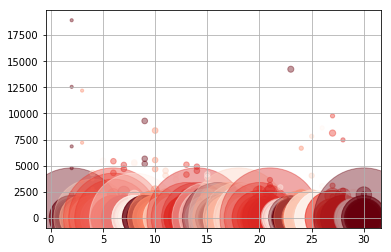

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_sampledf['日期'],test_sampledf['曝光次数'],s=test_sampledf['出价'],c=test_sampledf['曝光日期_s'],alpha=0.4,cmap='Reds')
plt.grid()

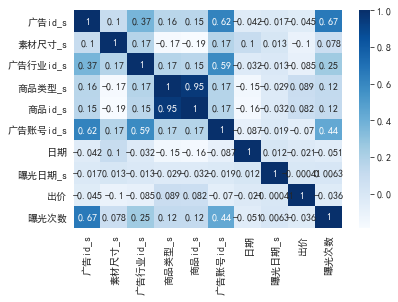

In [77]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.heatmap(test_sampledf[attrs].corr(),annot=True,cmap='Blues')

In [78]:
# 商品id和商品类型 强关联,广告id对曝光次数的影响较大
# 出价竟然和曝光次数反向相关
test_sampledf.drop(['商品id_s'],axis=1,inplace=True)

d:\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [79]:
test_sampledf.max()

广告id_s        78349.0
素材尺寸_s       561424.0
广告行业id_s     355262.0
商品类型_s      1181567.0
广告账号id_s     183685.0
日期               30.0
曝光日期_s       261798.0
出价            10000.0
曝光次数          18923.0
dtype: float64

In [235]:
test_sampledf=np.log1p(test_sampledf)

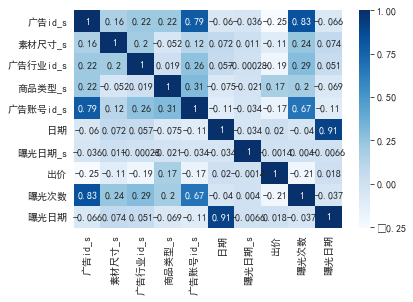

In [86]:
sns.heatmap(test_sampledf.corr(),annot=True,cmap='Blues')

In [242]:
# 划分训练集和验证集
test_sampledf=np.log1p(test_sampledf)
test_sampledf['曝光日期']=test_sampledf_o['曝光日期']
test_sampledf['星期']=test_sampledf['日期'].mod(7)
x_train=pd.DataFrame()
x_train=test_sampledf[(test_sampledf['曝光日期'] !=20190319) ] # &(test_sampledf['曝光日期'] !=0)
y_train=x_train['曝光次数']
x_train.drop(['曝光次数'],axis=1,inplace=True)
x_train.drop(['曝光日期'],axis=1,inplace=True)
#x_train.drop(['广告id_s'],axis=1,inplace=True)
x_train.drop(['日期'],axis=1,inplace=True)
#x_train.drop(['出价'],axis=1,inplace=True)

x_test=test_sampledf[(test_sampledf['曝光日期'] ==20190319)] #&(test_sampledf['曝光日期'] !=0)
y_test=x_test['曝光次数']
x_test.drop(['曝光次数'],axis=1,inplace=True)
x_test.drop(['曝光日期'],axis=1,inplace=True)
#x_test.drop(['广告id_s'],axis=1,inplace=True)
x_test.drop(['日期'],axis=1,inplace=True)
#x_test.drop(['出价'],axis=1,inplace=True)

In [245]:
test_sampledf['日期']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
27643    30
27644    30
27645    30
27646    30
27647    30
27648    30
27649    30
27650    30
27651    30
27652    30
27653    30
27654    30
27655    30
27656    30
27657    30
27658    30
27659    30
27660    30
27661    30
27662    30
27663    30
27664    30
27665    30
27666    30
27667    30
27668    30
27669    30
27670    30
27671    30
27672    30
Name: 日期, Length: 27673, dtype: int64

In [195]:
x_train.dtypes

广告id_s      float64
素材尺寸_s      float64
广告行业id_s    float64
商品类型_s      float64
广告账号id_s    float64
曝光日期_s      float64
出价          float64
dtype: object

In [180]:
import tensorflow as tf

from keras import backend as K
def mean_squared_error3(y_true, y_pred):
    return 2*K.mean(K.abs(y_pred-y_true)/(y_pred+y_true),axis=-1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(5, activation=tf.nn.sigmoid),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.relu)
])
model.compile(tf.train.GradientDescentOptimizer(0.03),loss=mean_squared_error3, metrics=['accuracy'])

model.fit(x_train.get_values(), y_train.get_values(), epochs=15,verbose=1, validation_split=0.2, shuffle=True)
model.evaluate(x_test.get_values(), y_test.get_values())

Train on 21100 samples, validate on 5276 samples
Epoch 1/15
21100/21100 [==============================] - 2s 72us/sample - loss: 0.5850 - acc: 0.0000e+00 - val_loss: 0.5258 - val_acc: 0.0000e+00
Epoch 2/15
21100/21100 [==============================] - 1s 55us/sample - loss: 0.5540 - acc: 0.0000e+00 - val_loss: 0.5056 - val_acc: 0.0000e+00
Epoch 3/15
21100/21100 [==============================] - 1s 52us/sample - loss: 0.5265 - acc: 0.0000e+00 - val_loss: 0.4704 - val_acc: 0.0000e+00
Epoch 4/15
21100/21100 [==============================] - 1s 48us/sample - loss: 0.4819 - acc: 0.0000e+00 - val_loss: 0.4134 - val_acc: 0.0000e+00
Epoch 5/15
21100/21100 [==============================] - 1s 55us/sample - loss: 0.4518 - acc: 0.0000e+00 - val_loss: 0.4061 - val_acc: 0.0000e+00
Epoch 6/15
21100/21100 [==============================] - 1s 56us/sample - loss: 0.4356 - acc: 0.0000e+00 - val_loss: 0.3954 - val_acc: 0.0000e+00
Epoch 7/15
21100/21100 [==============================] - 1s 60us/sam

[0.36521235857454737, 0.0]

In [303]:
x_train

,广告id_s,素材尺寸_s,广告行业id_s,商品类型_s,商品id_s,广告账号id_s,曝光日期_s,出价,星期
0,7.468513,12.084758,11.425907,13.982353,13.990255,8.184793,12.066483,4.110874,0.693147
1,3.295837,11.932576,9.223553,13.982353,13.990255,3.295837,12.066483,5.017280,0.693147
2,2.197225,9.867290,9.303284,11.702065,2.197225,2.197225,12.066483,4.615121,0.693147
3,3.044522,13.238233,5.645447,13.982353,13.990255,4.890349,12.066483,4.875197,0.693147
4,3.091042,12.719746,9.223553,11.702065,3.091042,3.258097,12.066483,4.394449,0.693147
5,1.609438,9.867290,9.303284,11.702065,1.609438,1.609438,12.066483,4.488636,0.693147
6,3.713572,11.932576,5.645447,13.982353,13.990255,4.890349,12.066483,4.875197,0.693147
7,4.584967,12.084758,9.825310,13.982353,13.990255,4.584967,12.066483,4.770685,0.693147
8,1.386294,9.867290,9.950180,11.702065,1.386294,1.386294,12.066483,4.615121,0.693147
9,4.158883,11.007585,8.583730,13.982353,13.990255,6.687109,12.475332,5.707110,1.098612


In [400]:
x_train.shape[1]

8

In [458]:
# 神经网路模型2

test_sampledf = pd.DataFrame(pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0_typeStatistic.csv'
                                         ,sep=','))

attrs=['广告id_s','素材尺寸_s','广告行业id_s','商品类型_s','商品id_s','广告账号id_s','日期','曝光日期_s','出价','曝光次数','曝光日期']
#test_sampledf=test_sampledf[attrs]

# 划分训练集和验证集
#test_sampledf['星期']=test_sampledf['日期'].mod(7)
x_train=pd.DataFrame()
x_train=test_sampledf[(test_sampledf['曝光日期'] !=20190319) ] # &(test_sampledf['曝光日期'] !=0)

y_train=x_train['曝光次数']
x_train.drop(['曝光次数'],axis=1,inplace=True)
x_train.drop(['曝光日期'],axis=1,inplace=True)
#x_train.drop(['广告id_s'],axis=1,inplace=True)
x_train.drop(['日期'],axis=1,inplace=True)
x_train.drop(['出价'],axis=1,inplace=True)
x_train=np.log1p(x_train)

x_test=test_sampledf[(test_sampledf['曝光日期'] ==20190319)] #&(test_sampledf['曝光日期'] !=0)
y_test=x_test['曝光次数']
x_test.drop(['曝光次数'],axis=1,inplace=True)
x_test.drop(['曝光日期'],axis=1,inplace=True)
#x_test.drop(['广告id_s'],axis=1,inplace=True)
x_test.drop(['日期'],axis=1,inplace=True)
x_test.drop(['出价'],axis=1,inplace=True)
x_test=np.log1p(x_test)


import tensorflow as tf
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
def mean_squared_error3(y_true, y_pred):
    return 2*K.mean(K.abs(y_pred-y_true)/(y_pred+y_true),axis=-1)

In [459]:
#19.433681735324 
seed=7
np.random.seed(seed)
# 建立模型
optimizer='adam'
init='normal'
model=Sequential()
model.add(Dense(units=14,activation='relu',input_dim=x_train.shape[1],kernel_initializer=init))
#构建更多的隐藏层
model.add(Dense(units=11,activation='relu',kernel_initializer=init))
model.add(Dense(units=6,activation='relu',kernel_initializer=init))
model.add(Dense(units=1,kernel_initializer=init)) #输出层不需要进行激活函数,预测回归的话unit=1
# 编译模型
model.compile(optimizer=optimizer,loss=mean_squared_error3,metrics=['acc'])#,optimizer=tf.train.GradientDescentOptimizer(0.03)
model.fit(x_train.values,y_train.values,epochs=20,batch_size=1600,verbose=1, validation_split=0.3, shuffle=True)

#model.evaluate(x_test.get_values(), y_test.get_values())
# 测试分数 (0-2之间,越小越好)  19.418521650188318
def getSMAPEScore (y_true, y_pred):    
    #print(y_true)
    # 预测值小于0如何处理 y_pred=np.abs(y_pred)
    y_pred=(np.abs(y_pred) + y_pred) / 2
    SMAPE=2.0 * np.mean(np.abs(y_pred - y_true+0.0001) / (y_pred+ y_true+0.0001)) 
    return   SMAPE,40*(1-SMAPE/2)  #SMAPE #
temp=model.predict(x_test.values, batch_size=10)
#y_pred=np.expm1(temp)
y_pred=temp
#y_true=np.expm1(y_test)
y_true=y_test
getSMAPEScore(y_true.values,y_pred)

Train on 18463 samples, validate on 7913 samples
Epoch 1/20
18463/18463 [==============================] - 7s 389us/step - loss: 1.9871 - acc: 0.0000e+00 - val_loss: 1.9727 - val_acc: 0.0000e+00
Epoch 2/20
18463/18463 [==============================] - 0s 7us/step - loss: 1.9548 - acc: 0.0000e+00 - val_loss: 1.9329 - val_acc: 0.0000e+00
Epoch 3/20
18463/18463 [==============================] - 0s 7us/step - loss: 1.8995 - acc: 0.0000e+00 - val_loss: 1.8585 - val_acc: 0.0000e+00
Epoch 4/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.7915 - acc: 0.0000e+00 - val_loss: 1.7141 - val_acc: 0.0000e+00
Epoch 5/20
18463/18463 [==============================] - ETA: 0s - loss: 1.6421 - acc: 0.0000e+0 - 0s 6us/step - loss: 1.5978 - acc: 0.0130 - val_loss: 1.4760 - val_acc: 0.1154
Epoch 6/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.3152 - acc: 0.2166 - val_loss: 1.1844 - val_acc: 0.2026
Epoch 7/20
18463/18463 [==============================] - 0

(1.0286164946690957, 19.427670106618088)

In [460]:
#19.43243815486005
seed=7
np.random.seed(seed)
# 建立模型
optimizer='adam'
init='normal'
model=Sequential()
model.add(Dense(units=14,activation='relu',input_dim=x_train.shape[1],kernel_initializer=init))
#构建更多的隐藏层
model.add(Dense(units=11,activation='relu',kernel_initializer=init))
model.add(Dense(units=6,activation='relu',kernel_initializer=init))
model.add(Dense(units=1,kernel_initializer=init)) #输出层不需要进行激活函数,预测回归的话unit=1
# 编译模型
model.compile(optimizer=optimizer,loss=mean_squared_error3,metrics=['acc'])#,optimizer=tf.train.GradientDescentOptimizer(0.03)
model.fit(x_train.values,y_train.values,epochs=20,batch_size=1600,verbose=1, validation_split=0.3, shuffle=True)

#model.evaluate(x_test.get_values(), y_test.get_values())
# 测试分数 (0-2之间,越小越好)  19.418521650188318
def getSMAPEScore (y_true, y_pred):    
    #print(y_true)
    # 预测值小于0如何处理 y_pred=np.abs(y_pred)
    y_pred=(np.abs(y_pred) + y_pred) / 2
    SMAPE=2.0 * np.mean(np.abs(y_pred - y_true+0.0001) / (y_pred+ y_true+0.0001)) 
    return   SMAPE,40*(1-SMAPE/2)  #SMAPE #
temp=model.predict(x_test.values, batch_size=10)
#y_pred=np.expm1(temp)
y_pred=temp
#y_true=np.expm1(y_test)
y_true=y_test
getSMAPEScore(y_true.values,y_pred)

Train on 18463 samples, validate on 7913 samples
Epoch 1/20
18463/18463 [==============================] - 5s 294us/step - loss: 1.9877 - acc: 0.0000e+00 - val_loss: 1.9733 - val_acc: 0.0000e+00
Epoch 2/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.9557 - acc: 0.0000e+00 - val_loss: 1.9340 - val_acc: 0.0000e+00
Epoch 3/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.9011 - acc: 0.0000e+00 - val_loss: 1.8609 - val_acc: 0.0000e+00
Epoch 4/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.7949 - acc: 0.0000e+00 - val_loss: 1.7182 - val_acc: 0.0000e+00
Epoch 5/20
18463/18463 [==============================] - 0s 7us/step - loss: 1.6015 - acc: 0.0121 - val_loss: 1.4773 - val_acc: 0.1120
Epoch 6/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.3129 - acc: 0.2165 - val_loss: 1.1793 - val_acc: 0.2026
Epoch 7/20
18463/18463 [==============================] - 0s 6us/step - loss: 1.1213 - acc: 0.2022 - 

(1.0283780922569974, 19.43243815486005)

In [414]:
sample_total_no0 = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0.csv',sep='\t')
sample_total_no0_df = pd.DataFrame(sample_total_no0)
sample_total_no0_df

,样本id,广告id,创建时间,素材尺寸,广告行业id,商品类型,商品id,广告账号id,投放时间,人群定向,出价,曝光次数,曝光日期
0,0,114156,20190217223714,14,221,1,-1,19185,"17592185978880,17592185978880,17592185978880,1...","age:347,787,753,601,144,522,79,847,229,202,829...",60,204.0,20190218
1,2,172599,20190217134519,64,136,1,-1,942,"281474976710655,281474976710655,28147497671065...","age:1,347,787,753,601,522,202,229,731,333,393,...",150,26.0,20190218
2,3,310333,20190217094244,34,12,13,25097,11899,"281474976694272,281474976694272,28147497669427...","age:217,601,79,202,837,942,638,394,347,731,739...",100,5.0,20190218
3,4,358858,20190217095428,30,199,1,-1,19838,"281474976710655,281474976710655,28147497671065...","age:217,601,570,202,837,602,935,942,638,287,31...",130,3.0,20190218
4,6,452383,20190217053808,40,136,13,2613,19085,"211106232532992,211106232532992,21110623253299...",area:7572,80,2.0,20190218
5,7,482671,20190217201132,34,12,13,9957,2401,"17526704308224,17526704308224,17526704308224,1...","age:217,601,79,202,837,942,638,394,347,731,739...",88,2.0,20190218
6,8,494777,20190217095428,64,199,1,-1,19838,"281474976710655,281474976710655,28147497671065...","age:217,601,570,202,837,602,935,942,638,287,31...",130,4.0,20190218
7,9,518686,20190217172755,14,25,1,-1,28907,"281474976710655,281474976710655,28147497671065...","age:99,989,601,729,214,362,507,443,837,870,795...",117,97.0,20190218
8,10,521326,20190217054001,34,146,13,17880,24105,"281474976694272,281474976694272,28147497669427...","age:217,601,79,202,837,942,638,394,347,731,739...",100,1.0,20190218
9,12,580632,20190217122113,34,84,13,12333,5923,"4187848949760,4187848949760,4187848949760,4187...","age:217,601,79,202,837,942,638,394,347,731,739...",163,0.0,20190218


In [440]:
import time
# 通过模型对测试集进行预测
tx_test_samplefile = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\test_sample.dat ',sep='\t',
                             header=None,names=['样本id','广告id','创建时间','素材尺寸','广告行业id'
                                                           ,'商品类型','商品id','广告账号id','投放时间','人群定向'
                                                            ,'出价'])
tx_test_sampledf = pd.DataFrame(tx_test_samplefile)
tx_test_sampledf['创建时间']=tx_test_sampledf['创建时间'].apply(lambda x:time.strftime("%Y%m%d",time.localtime(x))) 
tx_test_sampledf['创建时间']=tx_test_sampledf['创建时间'].astype('int64')
#转成星期几
tx_test_sampledf['曝光日期']=tx_test_sampledf['创建时间'].apply(lambda x: 32 if (x<20190321) else (x+1-20190301+11+1)).mod(7)
#只取中位数的广告进行预测
# 3月21日（周四）

#需要转换成训练集的形式
sample_total_no0 = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0.csv',sep='\t')
sample_total_no0_df = pd.DataFrame(sample_total_no0)
sample_total_no0_df.astype('str')

sample_total_no0_df['出价']=sample_total_no0_df['出价'].astype('float')
sample_total_no0_df['曝光日期']=sample_total_no0_df['曝光日期'].astype('int64')
sample_total_no0_df['曝光次数']=sample_total_no0_df['曝光次数'].astype('int64')
sample_total_no0_df=sample_total_no0_df[sample_total_no0_df['曝光次数']!=0]

#转换成星期几 
sample_total_no0_df['曝光日期']=sample_total_no0_df['曝光日期'].apply(lambda x: (x-20190218+1) if (x<20190301) else (x-20190301+11+1))
sample_total_no0_df['曝光日期']=sample_total_no0_df['曝光日期'].mod(7)

ad_id_stat=sample_total_no0_df.groupby(by=['广告id'])['曝光次数'].sum()  #广告id 为index
ad_size_stat=sample_total_no0_df.groupby(by=['素材尺寸'])['曝光次数'].sum()  
ad_industry=sample_total_no0_df.groupby(by=['广告行业id'])['曝光次数'].sum()  
good_type=sample_total_no0_df.groupby(by=['商品类型'])['曝光次数'].sum()  
goods_id=sample_total_no0_df.groupby(by=['商品id'])['曝光次数'].sum()  
ad_account_id=sample_total_no0_df.groupby(by=['广告账号id'])['曝光次数'].sum()  
day_week=sample_total_no0_df.groupby(by=['曝光日期'])['曝光次数'].sum()  

In [441]:
tx_test_sampledf

,样本id,广告id,创建时间,素材尺寸,广告行业id,商品类型,商品id,广告账号id,投放时间,人群定向,出价,曝光日期
0,1,394352,20180622,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120,4
1,2,585401,20190320,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42,4
2,3,419408,20190320,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6,4
3,4,405326,20190322,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181,6
4,5,578942,20181103,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31,4
5,6,269774,20190304,40,122,13,23440,18260,"17592184995840,17592184995840,17592184995840,1...",area:12041,49,4
6,7,416368,20181227,34,84,13,1855,9609,"267386880,267386880,267386880,267386880,267386...","age:819,608,988,741,202,837,400,394,942,361,72...",113,4
7,8,574309,20181218,14,25,1,-1,18556,"281474976706560,281474976706560,28147497670656...","age:608,988,202,837,5,400,394,714,972,942,361,...",34,4
8,9,142702,20181221,1,50,1,-1,3408,"281474976710655,281474976710655,28147497671065...",all,358,4
9,10,255347,20190311,40,122,13,6657,616,"281474976694272,281474976694272,28147497669427...",all,30,4


In [467]:
# 对于不存的广告id 使用中值填充,均值太高,不合适
def get_type_number(x,series):
    if x in (series.index.get_values()) :
        return series[[x]].values[0]
    else:
        #修改成平均值
        return series.mean()
    
tx_test_sampledf['广告id_s']=tx_test_sampledf['广告id'].apply(lambda x : get_type_number(x,ad_id_stat))
tx_test_sampledf['素材尺寸_s']=tx_test_sampledf['素材尺寸'].apply(lambda x : get_type_number(x,ad_size_stat))
tx_test_sampledf['广告行业id_s']=tx_test_sampledf['广告行业id'].apply(lambda x : get_type_number(x,ad_industry))
tx_test_sampledf['商品类型_s']=tx_test_sampledf['商品类型'].apply(lambda x : get_type_number(x,good_type))
tx_test_sampledf['商品id_s']=tx_test_sampledf['商品id'].apply(lambda x : get_type_number(x,goods_id))
tx_test_sampledf['广告账号id_s']=tx_test_sampledf['广告账号id'].apply(lambda x : get_type_number(x,ad_account_id))
tx_test_sampledf['曝光日期_s']=tx_test_sampledf['曝光日期'].apply(lambda x : day_week[[x]].values[0] )

In [469]:
attrs=['广告id_s','素材尺寸_s','广告行业id_s','商品类型_s','商品id_s','广告账号id_s','曝光日期_s','出价']
#test_sampledf=test_sampledf[attrs]

tx_train=tx_test_sampledf[attrs]
#x_train.drop(['广告id_s'],axis=1,inplace=True)
tx_train.drop(['出价'],axis=1,inplace=True)
tx_train=np.log1p(tx_train)
tx_submission=model.predict(tx_train.values, batch_size=10)

In [480]:
# 纯模型加单调性得分79.078
# 改进,考虑是用模型预测历史不存在的广告,和86.4的高分结果集结合
high_score_result = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\submission\\0508-1\\submission-86.405.csv',sep=',',
                             header=None,names=['样本id','高分曝光次数'])

tx_test_sampledf['曝光次数']=pd.DataFrame(tx_submission)[0]
#tx_test_sampledf.sort_values(by=['广告id','出价'])
tx_test_sampledf['曝光次数']=(tx_test_sampledf['曝光次数']+tx_test_sampledf['出价']/10000).round(decimals=4)
tx_test_sampledf['高分曝光次数']=high_score_result['高分曝光次数']
tx_test_sampledf['融合曝光']=tx_test_sampledf.apply(lambda x: x['曝光次数']
                                                if x['高分曝光次数']==x['出价']/10000 else  x['高分曝光次数'],axis=1).round(decimals=4)
tx_test_sampledf.to_csv("E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\submission\\0508-1\\submission.csv",sep=",",
                    index=False,encoding="utf-8",header=False,columns=["样本id","融合曝光"])

In [466]:

tx_test_sampledf.to_csv("E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\submission\\0508-1\\submission.csv",sep=",",
                    index=False,encoding="utf-8",header=False,columns=["样本id","曝光次数"])

In [300]:
temp=model.predict(x_test.values, batch_size=10)
#y_pred=np.expm1(temp)
y_pred=temp
#y_true=np.expm1(y_test)
y_true=y_test
getSMAPEScore(y_true.values,y_pred)

[  1   7  26 ...   8  68 409]


17.380972153673593

In [ ]:
#18.666914328634853
#19.276811282841958

In [198]:
test_sampledf = pd.DataFrame(pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0_typeStatistic.csv'
                                         ,sep=','))
test_samplefile_o = pd.read_csv('E:\\work\\tencent\\algo.qq.com_641013010_testa\\testA\\sample\\sample_total_no0.csv',sep='\t')
test_sampledf_o = pd.DataFrame(test_samplefile_o)


In [218]:
test_sampledf=pd.DataFrame()
test_sampledf['广告id']=test_samplefile_o['广告id']
test_sampledf['素材尺寸']=test_samplefile_o['素材尺寸']
test_sampledf['广告行业id']=test_samplefile_o['广告行业id']
test_sampledf['商品类型']=test_samplefile_o['商品类型']
test_sampledf['商品id']=test_samplefile_o['商品id']
test_sampledf['广告账号id']=test_samplefile_o['广告账号id']
test_sampledf['出价']=test_samplefile_o['出价']
test_sampledf['曝光次数']=test_samplefile_o['曝光次数']
test_sampledf['曝光日期']=test_samplefile_o['曝光日期']
#素材尺寸	广告行业id	商品类型	商品id	广告账号id	投放时间	人群定向

In [225]:
x_train

,广告id,素材尺寸,广告行业id,商品类型,商品id,广告账号id,出价,曝光日期
0,114156,14,221,1,-1,19185,60,20190218
1,172599,64,136,1,-1,942,150,20190218
2,310333,34,12,13,25097,11899,100,20190218
3,358858,30,199,1,-1,19838,130,20190218
4,452383,40,136,13,2613,19085,80,20190218
5,482671,34,12,13,9957,2401,88,20190218
6,494777,64,199,1,-1,19838,130,20190218
7,518686,14,25,1,-1,28907,117,20190218
8,521326,34,146,13,17880,24105,100,20190218
9,580632,34,84,13,12333,5923,163,20190218


In [226]:
# 划分训练集和验证集
x_train=pd.DataFrame()
x_train=test_sampledf[(test_sampledf['曝光日期'] !=20190319) ] # &(test_sampledf['曝光日期'] !=0)
y_train=x_train['曝光次数']
x_train.drop(['曝光次数'],axis=1,inplace=True)
x_train.drop(['曝光日期'],axis=1,inplace=True)

x_test=test_sampledf[(test_sampledf['曝光日期'] ==20190319)] #&(test_sampledf['曝光日期'] !=0)
y_test=x_test['曝光次数']
x_test.drop(['曝光次数'],axis=1,inplace=True)
x_test.drop(['曝光日期'],axis=1,inplace=True)

In [230]:
def getSMAPEScore (y_true, y_pred):    
    # 预测值小于0如何处理 y_pred=np.abs(y_pred)
    y_pred=(np.abs(y_pred) + y_pred) / 2
    SMAPE=2.0 * np.mean( (np.abs(y_pred - y_true)+0.00001) / (y_pred+ y_true+0.00001)) 
    print("SMAPE   分数::" + str(SMAPE))
    return   40*(1-SMAPE/2)  #SMAPE #

import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# 创建成lgb特征的数据集格式
lgb_train = lgb.Dataset(x_train, y_train) # 将数据保存到LightGBM二进制文件将使加载更快
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)  # 创建验证数据
 
# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
   # 'eval_metric':'mape',
    'objective': 'regression', # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'max_depth':10,#树的最大深度
    'num_leaves': 30,   # 叶子节点数
    'learning_rate': 0.03,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}
 
print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,lgb_train,num_boost_round=100,valid_sets=lgb_eval,early_stopping_rounds=50) # 训练数据需要参数列表和数据集
 
print('Save model...') 
 
gbm.save_model('model.txt')   # 训练后保存模型到文件
 
print('Start predicting...')
# 预测数据集
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration) #如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估模型
print('The smape score of prediction is:', getSMAPEScore(y_test,y_pred)) # 计算真实值和预测值之间的均方根误差

Start training...
[1]	valid_0's l2: 4855.8	valid_0's auc: 0.604347
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 4681.86	valid_0's auc: 0.602339
[3]	valid_0's l2: 4532.07	valid_0's auc: 0.602103
[4]	valid_0's l2: 4397.57	valid_0's auc: 0.602113
[5]	valid_0's l2: 4274.93	valid_0's auc: 0.602087
[6]	valid_0's l2: 4158.28	valid_0's auc: 0.601226
[7]	valid_0's l2: 4043.15	valid_0's auc: 0.602356
[8]	valid_0's l2: 3936.74	valid_0's auc: 0.60281
[9]	valid_0's l2: 3839.16	valid_0's auc: 0.613579
[10]	valid_0's l2: 3724.22	valid_0's auc: 0.616844
[11]	valid_0's l2: 3623.68	valid_0's auc: 0.615866
[12]	valid_0's l2: 3521.99	valid_0's auc: 0.617073
[13]	valid_0's l2: 3429.62	valid_0's auc: 0.617016
[14]	valid_0's l2: 3346.92	valid_0's auc: 0.617012
[15]	valid_0's l2: 3265.21	valid_0's auc: 0.623628
[16]	valid_0's l2: 3208.53	valid_0's auc: 0.6175
[17]	valid_0's l2: 3162.82	valid_0's auc: 0.617239
[18]	valid_0's l2: 3118.92	valid_0's auc: 0.617085
[19]	valid_0's 